## Dominant Color Extraction for Image Segmentation

#### Image Segmentation

- It is the process of partitioning a digital image into multiple segments (sets of pixels, also known as image objects). The goal of segmentation is to simplify and/or change the representation of an image into something that is more meaningful and easier to analyze. Image segmentation is typically used to locate objects and boundaries (lines, curves, etc.) in images. More precisely, image segmentation is the process of assigning a label to every pixel in an image such that pixels with the same label share certain characteristics.

- The result of image segmentation is a set of segments that collectively cover the entire image, or a set of contours extracted from the image (see edge detection). Each of the pixels in a region are similar with respect to some characteristic or computed property, such as color, intensity, or texture. Adjacent regions are significantly different with respect to the same characteristic(s).

- The process of partitioning a digital image into multiple segments (sets of pixels) for the purpose to simplify or change the representation of an image into something that is more meaningful and easier to analyze.

- A process consists of subdividing an image into its constituent parts and extracting these parts of interest (objects) from the image.

- Segmentation partitions an image into regions having similar visual appearance (color/intensity) corresponding to parts of objects
- We will try to extract the most dominant 'K' Colors using K-Means
- We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

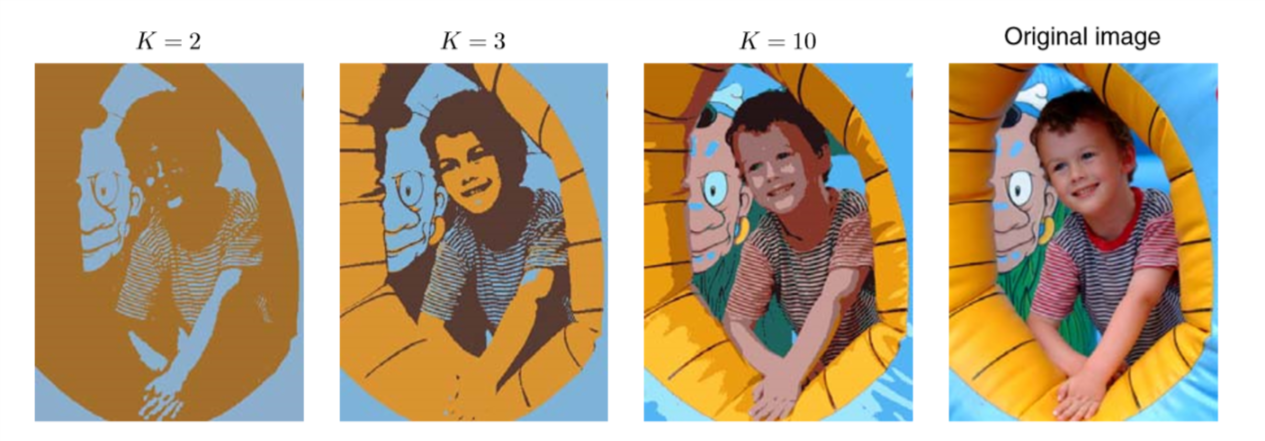

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Process of Image Segmentation :

Partitioning image into set of pixels such that pixels with same label share certain same characteristics or computed property like color , intensity etc.

- Reading Image
- Reshaping into 2-D Array
- Applying K-Means
- Extract Dominant Colors
- Assign these colors to the new image and reshape into original image

In [3]:
image = cv2.imread("sample.jpg")

original_shape = image.shape
print(original_shape)

(330, 500, 3)


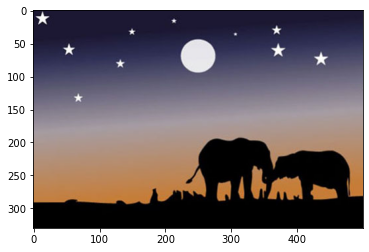

In [4]:
image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

In [6]:
all_pixels = image.reshape((-1 , 3))
print(all_pixels.shape)

(165000, 3)


In [7]:
all_pixels[0]

array([23, 19, 46], dtype=uint8)

In [8]:
from sklearn.cluster import KMeans

### For K = 4

In [9]:
dominant_colors = 4

clf = KMeans(n_clusters = dominant_colors)
clf.fit(all_pixels)

KMeans(n_clusters=4)

In [10]:
centers = clf.cluster_centers_
centers = np.array(centers , dtype = 'uint8')
print(centers)

[[  1   0   1]
 [ 99  95 118]
 [175 145 128]
 [ 38  35  64]]


In [11]:
labels = clf.labels_
print(labels)

[3 3 3 ... 0 0 0]


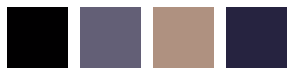

In [12]:
i = 1
plt.figure(figsize = (5,3))

colors = []

for each_col in centers:
    plt.subplot(1, 4, i)
    
    colors.append(each_col)
    
    # Color Swatch
    a = np.zeros((100, 100, 3) , dtype = 'uint8')
    a[:, :, :] = each_col
    
    plt.imshow(a)
    plt.axis('off')
    i = i+1

In [13]:
colors

[array([1, 0, 1], dtype=uint8),
 array([ 99,  95, 118], dtype=uint8),
 array([175, 145, 128], dtype=uint8),
 array([38, 35, 64], dtype=uint8)]

In [14]:
new_image = np.zeros((330*500 , 3) , dtype='uint8')

print(new_image.shape)  

(165000, 3)


In [15]:
new_image[0]

array([0, 0, 0], dtype=uint8)

In [16]:
np.unique(labels , return_counts= True)

(array([0, 1, 2, 3]), array([34535, 29524, 63196, 37745], dtype=int64))

In [17]:
colors[labels[0]] 

array([38, 35, 64], dtype=uint8)

In [18]:
for ix in range(new_image.shape[0]):        
    
    new_image[ix] = colors[labels[ix]]    # extract label for every pixel and map it to corresponding color

new_image = new_image.reshape((original_shape))
print(new_image.shape)

(330, 500, 3)


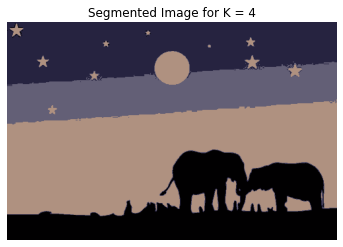

In [19]:
plt.imshow(new_image)
plt.title('Segmented Image for K = 4')
plt.axis('off')
plt.show()

### For K = 2

In [20]:
clf = KMeans(n_clusters = 2)
clf.fit(all_pixels)

centers = clf.cluster_centers_
centers = np.array(centers , dtype = 'uint8')

labels = clf.labels_

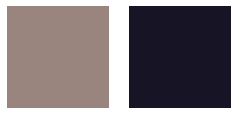

In [21]:
i = 1
plt.figure(figsize = (4, 2))

for each_col in centers:
    plt.subplot(1, 2, i)
    a = np.zeros((100, 100, 3) , dtype = 'uint8')
    a[:, :, :] = each_col
    plt.imshow(a)
    plt.axis('off')
    i += 1

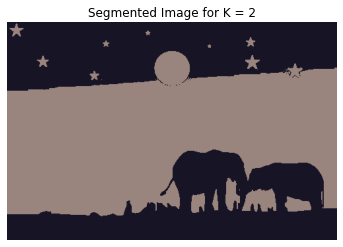

In [22]:
new_image = np.zeros((all_pixels.shape[0], 3) , dtype = 'uint8')

for i in range(new_image.shape[0]):
    new_image[i] = centers[labels[i]]
    
new_image = new_image.reshape((original_shape))

plt.imshow(new_image)
plt.title('Segmented Image for K = 2')
plt.axis('off')
plt.show()

### For K = 10

In [23]:
clf = KMeans(n_clusters = 10)
clf.fit(all_pixels)

centers = clf.cluster_centers_
centers = np.array(centers , dtype = 'uint8')

labels = clf.labels_

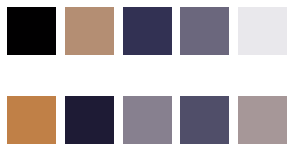

In [24]:
i = 1
plt.figure(figsize = (5, 3))

for each_col in centers:
    plt.subplot(2, 5, i)
    a = np.zeros((100, 100, 3) , dtype = 'uint8')
    a[:, :, :] = each_col
    plt.imshow(a)
    plt.axis('off')
    i = i+1

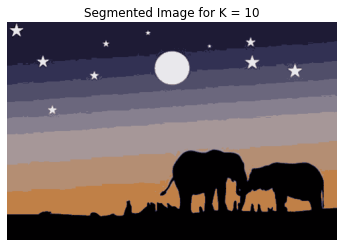

In [25]:
new_image = np.zeros((all_pixels.shape[0] , 3) , dtype = 'uint8')

for i in range(new_image.shape[0]):
    new_image[i] = centers[labels[i]]
    
new_image = new_image.reshape((original_shape))
plt.imshow(new_image)
plt.title('Segmented Image for K = 10')
plt.axis('off')
plt.show()